# `lab07`—“The Secret Weapon that Won the War”

**Objectives**

- Apply a brute-force attack to solve an encryption problem.
- Apply language-frequency and encryption ideas to decrypt a target message.

In the `encode` lab, you built a tool to reproduce the encryption algorithm of the World War II-era Nazi Enigma machine.  Today, you will recapitulate some of the work required to solve such an encryption if the encoding offsets are unknown.

This is a computer implementation of one possible solution method, although not the one that [the Allies used in WW2](https://en.wikipedia.org/wiki/Cryptanalysis_of_the_Enigma) to decrypt many Nazi German communiqués.  This technique only uses the target letter frequency of the German language, whereas in reality the Polish and later British codebreakers relied on certain repeated patterns and other tells.

## Enigma:  A Refresher

Enigma uses a polyalphabetic cipher, in which each letter pressed on a mechanical keyboard would both be encoded and trigger a rotor to change position.  Since the rotor determines the alphabet (either the offset or a randomized substitution pattern), each letter press *changes the subsequent encoding alphabet*.  It's like changing the offset according to some rule every time you encoded a letter above.

To clarify this, first think of a pair of rotors, or wheels.  The inner (red) wheel represents the base alphabet (of the message), and the outer (blue) wheel represents the letter each inner letter maps to (the encoding).  An offset of one produces the following diagram:

![](./img/rotor-base.png)

A rotor cipher simply chains multiple wheels together, so that a change in one wheel produces an encoded letter *but also changes the position of the encoding rotor* for the next letter.  For instance, before encoding the letter `'A'` from the inner wheel, the rotor configuration is at left.  After encoding `'A'` (to `'B'`), the wheel advances and gives us the *new* configuration at right, in which `'A'` now maps to `'C'`.

![](./img/rotor-pair.png)

In order to think about a rotor cipher, you will have to accept a message, and for each letter in that message you will need to:

1.  Encode the letter.
2.  Advance the offset of the rotors by one.

-   We provide a function `rotor_cipher` which accepts a string `message` and a list `m` of the starting offsets for the $n$ rotors.  `rotor_cipher` should `return` the message transformed by successively apply the rotor cipher across the alphabet.

In [1]:
#grade
# This is from last lab, do not modify
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def mapper( letter,offset=1 ):
    '''
    Map a single-character string letter forward by its offset.
    '''
    return alphabet[ ( alphabet.index( letter ) + offset ) % 26 ]

def decode_n_rotors( message,m ):
    decoded = ''
    message = message.upper()
    
    for letter in message:
        if letter in alphabet:
            decoded += mapper( letter,sum( m ) )
            # Rotate all rotors back.
            m[ 0 ] = ( m[ 0 ] - 1 ) % 26
            for i in range( 1,len( m ) ):
                if m[ i - 1 ] % 26 == 0:
                    m[ i ] = ( m[ i ] - 1 ) % 26  # here as well
        else:
            decoded += letter
    
    # Finally, return the result.
    return decoded

def encode_n_rotors( message,m ):
    encoded = ''
    
    # Convert the message to upper-case.
    message = message.upper()
    
    # Loop over each letter of the message.
    for letter in message:
        # If the letter is in the alphabet, then:
        if letter in alphabet:
            # 1. encode the letter
            encoded += mapper( letter,sum( m ) )
            # 2. advance the offset of each rotor by n=1 (modulo 26)
            m[ 0 ] = ( m[ 0 ] + 1 ) % 26
            for i in range( 1,len( m ) ):
                if m[ i - 1 ] % 26 == 0:
                    m[ i ] = ( m[ i ] + 1 ) % 26  # here as well

        # Otherwise, just add the whitespace or punctuation or numeric character to the encoded string.
        else:
            encoded += letter
    
    # Finally, return the encoded message.
    return encoded

In [2]:
# As an example, 'HELLO' maps to 'HFNOS' if it starts with an offset of 0 on one rotor:
#   H->H, E->F (1), L->N (2), L->O (3), O->S (4).
text = 'HELLO'
encode_n_rotors( text,[0,] )

'HFNOS'

In [3]:
# As an example, 'HELLO' maps to 'HFNOS' if it starts with an offset of [1,1] on two rotors:
#   H->J (1+1), E->H (2+1), L->P (3+1), L->Q (4+1), O->U (5+1).
text = 'HELLO'
encode_n_rotors( text,[1,1] )

'JHPQU'

### <span style="color:#345995">Exercise 0: Decode_n_rotors</span>

### A Brute-Force Solution

We will explore several potential solutions to this problem:

1.  A brute-force or exhaustive solution, which simply tries every single possible rotor configuration on an encrypted text.
2.  A one-letter frequency attack, based on the sort of calculations you did in the lab `language`.
3.  A three-letter frequency attack, based on the relative likelihood of a given three-letter combination in a language, like `ghi` or `nvy`.

First, the brute-force solution.  In this case, we make a guess about the number of rotors employed, try every combination, and visually inspect the results for the likely decryption.

For a single-rotor Enigma cipher, there is only one offset per letter, so only 26 possibilities need be tried for an exhaustive search.  For a two-rotor Enigma cipher, $26 \times 26 = 26^2 = 676$ cases must be tested.  In general, for $n$ rotors, $26^n$ cases must be searched.

We provide the partial function `decode_n_rotors( message,m )` which accepts an encrypted message `message` and a tuple or list of $n$ rotor offsets. You have to complete it using the concepts from `encode_n_rotor(message,m)`

In [6]:
#grade
def decode_n_rotors( message,m ):
    decoded = ''
    
    # Convert the message to upper-case.
    message = message.upper()
    
    # Reverse offsets for convenience.
    for i in range( len( m ) ):
        m[ i ] = -m[ i ]
    
    # Loop over each letter of the message.
    for letter in message:
        # If the letter is in the alphabet, then:
        if letter in alphabet:
            # 1. encode the letter
            decoded += mapper( letter,sum( m ) )
            # 2. decrement the offset of each rotor by n=1 (modulo 26)
            m[ 0 ] = ( m[ 0 ] - 1 ) % 26
            for i in range( 1,len( m ) ):
                if m[ i - 1 ] % 26 == 0:
                    m[ i ] = ( m[ i ] - 1 ) % 26
            
        # Otherwise, just add the whitespace or punctuation or numeric character to the encoded string.
        else:
            decoded += letter

    # Finally, return the result.
    return decoded

In [7]:
# Test [1,1] offset on two rotors.
test_text = """Mr. Fowler being a persevering man, as a good seaman should be, blockaded the house, and having met you
succeeded by certain arguments, metallic or otherwise, in convincing you that your interests were the same as his."""
code_text = """OU. JTCSMA LPUAU P FVJLYQAOGMG ODR, FY H OXYO EROBQE KAIPHA ZD, BMRGPGKMM DSQ UCJIV, SGX CWSGMG NGX DUB
ADMNQRRTT SQ VYMPXGM ASIXRKUBB, WPFNZAYT GK IODBPVITG, LR IVVESYOVBV OFM MBVP VMTR JPWIWLACC HQES IXV KTGZ WP FHS."""

print( encode_n_rotors( test_text,[ 1,1 ] ) )
assert encode_n_rotors( test_text,[ 1,1 ] ) == code_text

print( decode_n_rotors( code_text,[ 1,1 ] ) )
assert decode_n_rotors( code_text,[ 1,1 ] ) == test_text.upper()

OU. JTCSMA LPUAU P FVJLYQAOGMG ODR, FY H OXYO EROBQE KAIPHA ZD, BMRGPGKMM DSQ UCJIV, SGX CWSGMG NGX DUB
ADMNQRRTT SQ VYMPXGM ASIXRKUBB, WPFNZAYT GK IODBPVITG, LR IVVESYOVBV OFM MBVP VMTR JPWIWLACC HQES IXV KTGZ WP FHS.
MR. FOWLER BEING A PERSEVERING MAN, AS A GOOD SEAMAN SHOULD BE, BLOCKADED THE HOUSE, AND HAVING MET YOU
SUCCEEDED BY CERTAIN ARGUMENTS, METALLIC OR OTHERWISE, IN CONVINCING YOU THAT YOUR INTERESTS WERE THE SAME AS HIS.


In [9]:
# Test [2,2,2] offset on three rotors.
test_text = """Mr. Fowler being a persevering man, as a good seaman should be, blockaded the house, and having met you
succeeded by certain arguments, metallic or otherwise, in convincing you that your interests were the same as his."""
code_text = """SY. NXGWQE PTYEY T JZNPCUESKQL SHV, JC L SBCS IVSFUI OEMTLE DH, FRVKTKOQQ HWU YGNMZ, WKB GAWKQK RLB HYF
EHQRUVVXX WU ZCQTBKQ EWMCVOYFF, ATJRDECX KO MSHFTZMXK, PW MZZIWCSZFZ SJQ QFZT ZQXV NTAMBPEGG LUIW MBZ OXKD AT JLW."""

print( encode_n_rotors( test_text,[ 2,2,2 ] ) )
assert encode_n_rotors( test_text,[ 2,2,2 ] ) == code_text

code_text = encode_n_rotors( test_text,[ 2,2,2 ] )
print( decode_n_rotors( code_text,[ 2,2,2 ] ) )
assert decode_n_rotors( code_text,[ 2,2,2 ] ) == test_text.upper()

SY. NXGWQE PTYEY T JZNPCUESKQL SHV, JC L SBCS IVSFUI OEMTLE DH, FRVKTKOQQ HWU YGNMZ, WKB GAWKQK RLB HYF
EHQRUVVXX WU ZCQTBKQ EWMCVOYFF, ATJRDECX KO MSHFTZMXK, PW MZZIWCSZFZ SJQ QFZT ZQXV NTAMBPEGG LUIW MBZ OXKD AT JLW.
MR. FOWLER BEING A PERSEVERING MAN, AS A GOOD SEAMAN SHOULD BE, BLOCKADED THE HOUSE, AND HAVING MET YOU
SUCCEEDED BY CERTAIN ARGUMENTS, METALLIC OR OTHERWISE, IN CONVINCING YOU THAT YOUR INTERESTS WERE THE SAME AS HIS.


Given these two tools, we can encrypt any message like the Enigma would.  We can also decrypt using candidate offsets in an attempt to solve an unknown message.

### <span style="color:#345995">Exercise 1: Find a Single Encoding</span>

-   Consider the following message, which has been encoded by one rotor.  Write a loop which attempts all 26 possible rotor offsets and displays the result.  Use the only English-language result to identify the correct offset.

In [71]:
#grade
code_text = """KGH GVJV QDCSGWW"""
for i in range(26):
    print(i,decode_n_rotors(code_text,[i]))
# Write a loop here to test all possible combinations for code_text with one rotor.
# You should output each result and index so you see which one is correct.

0 KFF DREP JVTIVKJ
1 JEE CQDO IUSHUJI
2 IDD BPCN HTRGTIH
3 HCC AOBM GSQFSHG
4 GBB ZNAL FRPERGF
5 FAA YMZK EQODQFE
6 EZZ XLYJ DPNCPED
7 DYY WKXI COMBODC
8 CXX VJWH BNLANCB
9 BWW UIVG AMKZMBA
10 AVV THUF ZLJYLAZ
11 ZUU SGTE YKIXKZY
12 YTT RFSD XJHWJYX
13 XSS QERC WIGVIXW
14 WRR PDQB VHFUHWV
15 VQQ OCPA UGETGVU
16 UPP NBOZ TFDSFUT
17 TOO MANY SECRETS
18 SNN LZMX RDBQDSR
19 RMM KYLW QCAPCRQ
20 QLL JXKV PBZOBQP
21 PKK IWJU OAYNAPO
22 OJJ HVIT NZXMZON
23 NII GUHS MYWLYNM
24 MHH FTGR LXVKXML
25 LGG ESFQ KWUJWLK


In [72]:
#grade
decoded_text = decode_n_rotors(code_text,[17]) 
print(decoded_text)# Write key value here

TOO MANY SECRETS


### <span style="color:#345995">Exercise 2: Find a Double Encoding</span>

-   Consider the following message, which has been encoded by two rotors.  Write a nested loop which attempts all $26 \times 26 = 676$ possible rotor offsets and displays the result.  Use this to identify the correct offset.  Store each output in a list named `possible_msg`

In [68]:
possible_msg = []
code_text = """JBTDR HQQRG NQEO JAH IE"""
for i in range(26):
    for n in range(26):
        print(i,n,decode_n_rotors(code_text,[i,n,]))

# Write a nested loop here to test all possible combinations for code_text with two rotors.

0 0 JARAN CKJJX DFSB VLR RM
0 1 IZQZM BJIIW CERA UKQ QL
0 2 HYPYL AIHHV BDQZ TJP PK
0 3 GXOXK ZHGGU ACPY SIO OJ
0 4 FWNWJ YGFFT ZBOX RHN NI
0 5 EVMVI XFEES YANW QGM MH
0 6 DULUH WEDDR XZMV PFL LG
0 7 CTKTG VDCCQ WYLU OEK KF
0 8 BSJSF UCBBP VXKT NDJ JE
0 9 ARIRE TBAAO UWJS MCI ID
0 10 ZQHQD SAZZN TVIR LBH HC
0 11 YPGPC RZYYM SUHQ KAG GB
0 12 XOFOB QYXXL RTGP JZF FA
0 13 WNENA PXWWK QSFO IYE EZ
0 14 VMDMZ OWVVJ PREN HXD DY
0 15 ULCLY NVUUI OQDM GWC CX
0 16 TKBKX MUTTH NPCL FVB BW
0 17 SJAJW LTSSG MOBK EUA AV
0 18 RIZIV KSRRF LNAJ DTZ ZU
0 19 QHYHU JRQQE KMZI CSY YT
0 20 PGXGT IQPPD JLYH BRX XS
0 21 OFWFS HPOOC IKXG AQW WR
0 22 NEVER GONNB HJWF ZPV VQ
0 23 MDUDQ FNMMA GIVE YOU UP
0 24 LCTCP EMLLZ FHUD XNT TO
0 25 KBSBO DLKKY EGTC WMS SN
1 0 IZQZM BJIIW CERA UKQ QL
1 1 HYPYL AIHHV BDQZ TJP PK
1 2 GXOXK ZHGGU ACPY SIO OJ
1 3 FWNWJ YGFFT ZBOX RHN NI
1 4 EVMVI XFEES YANW QGM MH
1 5 DULUH WEDDR XZMV PFL LG
1 6 CTKTG VDCCQ WYLU OEK KF
1 7 BSJSF UCBBP VXKT NDJ JE
1 8 ARIRE TBAAO UWJS MCI ID
1 9 

We are already in trouble.  We can solve it fairly quickly for 676 possibilities, but locating the correct solution is becoming a problem.  As we increase the number of rotors, this is a problem for a brute-force approach.

One way out is to compare solutions to a dictionary of commonly used words, and flag possible matches.  Another is to analyze letter frequency in the result:  if it is close to the target language, then there may be a match.

### A Frequency-Based Solution

If we know that we are translating an English-language message, then we know the expected relative frequency of the letters.  Based on the principles outlined in `language`, we can automatically detect likely solutions even from many candidates.

Previously we used the language frequency to identify the most likely language.  For the Enigma code, we will instead use the language frequency to measure how close to English each sample is.  (Of course, it really would have been German, but we're working in English here.)

We'll need the ability to sort a dictionary of key-value pairs into two lists (of the keys and of the values), sorted by the values, in order to plot in order of value.  We can use this, for instance, to sort the standard English letter frequencies by order of frequency.  The blocks below carry out this sorting and plot it.  **None of these blocks requires modification.**

In [34]:
# plotting boilerplate
import matplotlib as mpl               # import MatPlotLib
import matplotlib.pyplot as plt        # import PyPlot
%matplotlib inline
mpl.rcParams['figure.figsize'] = 15,3  # set the aspect ratio and size of the figure

# We'll use this function to plot the letters and frequencies for the next while.
# You don't need to interpret it yet, but you can examine it as much as you like.
def plot_freq(xs, ys, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    N = len(xs)

    ## necessary variables
    import numpy as np    # the Numerical Python package---you'll see this soon in lecture
    index = np.arange(N)  # x locations for bars
    width = 0.75          # bar width

    ## the bars
    rects1 = ax.bar(index, ys, width, color='blue')

    # axes and labels
    ax.set_title(title)
    ax.set_ylabel('Proportion')

    ax.set_xlim(-width,len(index)+width)
    ax.set_ylim(0,.20)
    xTickMarks = xs
    ax.set_xticks(index+width/2)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, fontsize=10)
    
    plt.show()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-rvff7096 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [35]:
#grade
# Convert a dictionary to two lists sorted by the value of the second.
import operator
def dict2sort(in_dict):
    keys = sorted(in_dict, key=in_dict.get)[::-1]
    values = []
    for key in keys:
        values.append(in_dict[key])
    return keys, values

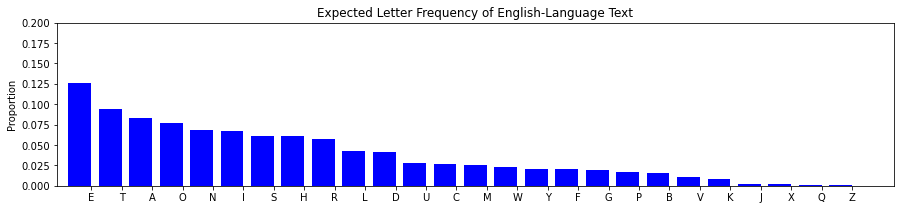

In [36]:
# Get standard English frequencies, sorted by order of frequency.
english_dict = {'A':0.0834,'B':0.0154,'C':0.0273,'D':0.0414,'E':0.126,'F':0.0203,'G':0.0192,'H':0.0611,'I':0.0671,'J':0.0023,'K':0.0087,
                'L':0.0424,'M':0.0253,'N':0.068,'O':0.077,'P':0.0166,'Q':0.0009,'R':0.0568,'S':0.0611,'T':0.0937,'U':0.0285,'V':0.0106,
                'W':0.0234,'X':0.002,'Y':0.0204,'Z':0.0006}
letters, freqs = dict2sort(english_dict)
plot_freq(letters, freqs, title='Expected Letter Frequency of English-Language Text')

We'll use our functions from `language` to aid in this.  Recall the function `calc_freq`, which returned a `dict` containing the relative frequency of letters in a sample of text.

In [37]:
#grade
# This function is already implemented for you
from string import whitespace, punctuation, digits
from string import ascii_uppercase as alphabet

def calc_freq(text):
    # Create an empty frequency dictionary letter_freq.
    letter_freq = {}
    
    # Make text upper-case.
    text = text.upper()
    
    # Loop over each letter of the alphabet:
    for letter in alphabet:
        letter_freq[letter] = text.count(letter)
    
    # Make a copy of text without non-alphabet characters.
    from string import whitespace, punctuation, digits
    for character in whitespace+punctuation+digits:
        text = text.replace(character, '')
    
    # Normalize the frequencies and put the results back into letter_freq.
    for key in letter_freq.keys():
        letter_freq[key] = letter_freq[key] / len(text)
    
    # Finally, return the dict letter_freq.
    return letter_freq

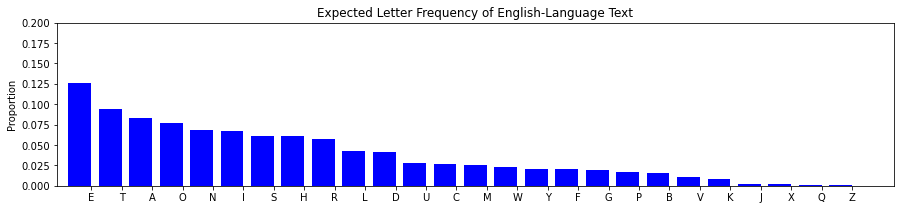

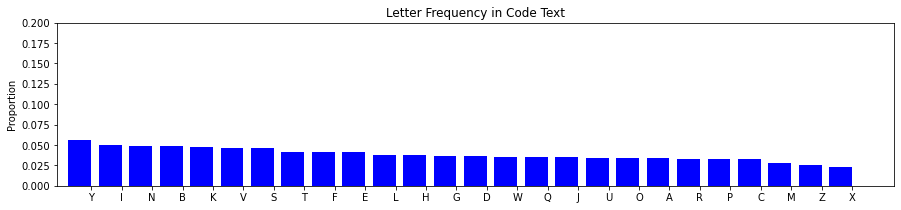

In [39]:
code = """'LAY “XKJNTTBDOI” SATJNBD YON RV VXMXNFZDD CTLIKRF IB DSQ ETQC FNGWAOQ VHPUH ICVYMBCTAAG QJ S WYXEJYK ASG FEQIBTJLWQ OM
UZFBNZ IBYMS. BNWLTANP CRP EHPYUUM IA PEGR PBRHV NY VACOYEVPAO KAY XKJNTTBDOI SATJNBD, UG WH QCEINP BOTAMNB IFYF BX NPRVBT QEV
BIRBQSIHCWI HUTXDDLNYS UKEUMCKKQ NF BP LRYKNZJV GMEWPRCW HL V OCZL PT FSRVBBJLWQ IOGYRTEY, XKKOUUCEPJ VYMMSNMGSH, QEV LI AKOSH.
UJH JZTKIVOYFNZ EHFTEYHO FLVPNYII GYM, QYHQISG, JYW LUHA FL DBEK GFYL, IWN T TNJT SYGLYI PEC BOOSYYGITN XFYOSGI WGK YSLIGBIU
WVJGAUNXE MF WCLFDOCIC QFD LFCWY IBUKBZGF HTSYFBKPA. F FNPF UKTXATH DZ SVJT QE SVWJQKR NF UJH VKSICSZZF CU JYW VIHLRRZBMG QYRIMAC,
QGAQIYFFL, UIZ PM EOSVK XT UVN KYAGVTH. KZBM REIJ HNDNXHJ G KNFPXBDBUEL HZ ODB RGEPTB SK LBVMEUBBH EW S KYVH SYQIBDOI JDWZNDERR XD
KWKGN KC ANMQWWEGRL VDWNRFH. QTUHLYEKE SO NA GIKOUQCSZA, O CKDTXL DO ZMLPVVDFQK PN RDD PSRYDSE WVJ YC VRJVWIS JVEW LJ M ZPSYAGY.
(VHXL SUSKQK, 1937)\n'"""

code_dict = calc_freq(code)
code_letters, code_freqs = dict2sort(code_dict)
plot_freq(letters, freqs, title='Expected Letter Frequency of English-Language Text')
plot_freq(code_letters, code_freqs, title='Letter Frequency in Code Text')

The Caesar cipher is particularly weak, and only worked in an ancient world with low literacy levels and no prior cryptographic experience.  If you analyze the frequency of the letters, for instance, and guess that the most frequent letter in a long encoded text corresponds to E, the second most frequent to A, etc., then you can soon break Caesar ciphers even if you do not know the offset ahead of time.

However, the Enigma cipher is much more clever.  The occurrence of each letter is nearly uniform, leaving us no direct way to attempt to break this code by a frequency analysis!  Higher-order patterns must be identified and analyzed, which is precisely what the British–Polish Ultra project did before and during World War II.

Instead, we will use brute-force to solve the encodings, then use frequency analysis to recommend likely solutions to the user.

Consider the following encoded communiqué intercepted from a submarine.  (This is a real Nazi Enigma communiqué.)

In [42]:
#grade
# Do not modify
final_boss_encoded = """RBFRUU LH MPXJCRHG GYWOUO JDEMPY. SUGLA WCWOEDT.
NDWY KUMVI AAFWIYFF 0830A UE 9863, YLSQSG WAT
NBVMBPP GKTDKQ WYBNBCR, SQHII KPOQD VZBHH. Y RE
YIGHLUHNH VLJ KUMVI. MMECBUKWK ZVHIQ EOVTWJKU UK,
GTZQ BDHKZ-GIMPE-CZSU, HRVIL NXEC, HVGXRZDBNT PBL
MAVVLGFS URVPE"""

Your challenge is to solve this.  All you know is that it was encoded with a four-rotor Enigma device.

### <span style="color:#345995">Exercise 3: Find a Triple Encoding</span>

-   Compose a series of loops to solve the encoded message using three rotors.  Store the decrypted text in a dictionary `messages`.  The key should be the rotor setting (as a tuple) and the value should be the decrypted message.  This dictionary should have $26^3 = 17,576$ entries after you are done.  _This may take several minutes to run._  The `print` statement lets you monitor the process.

In [66]:
#grade
messages = {}
for i in range( 26 ):
    for j in range( 26 ):
        print( i,j,end='\t' )
        for k in range( 26 ):
            text = decode_n_rotors(final_boss_encoded,[i,j,k])
            messages[ ( i,j,k ) ] = text

0 0	0 1	0 2	0 3	0 4	0 5	0 6	0 7	0 8	0 9	0 10	0 11	0 12	0 13	0 14	0 15	0 16	0 17	0 18	0 19	0 20	0 21	0 22	0 23	0 24	0 25	1 0	1 1	1 2	1 3	1 4	1 5	1 6	1 7	1 8	1 9	1 10	1 11	1 12	1 13	1 14	1 15	1 16	1 17	1 18	1 19	1 20	1 21	1 22	1 23	1 24	1 25	2 0	2 1	2 2	2 3	2 4	2 5	2 6	2 7	2 8	2 9	2 10	2 11	2 12	2 13	2 14	2 15	2 16	2 17	2 18	2 19	2 20	2 21	2 22	2 23	2 24	2 25	3 0	3 1	3 2	3 3	3 4	3 5	3 6	3 7	3 8	3 9	3 10	3 11	3 12	3 13	3 14	3 15	3 16	3 17	3 18	3 19	3 20	3 21	3 22	3 23	3 24	3 25	4 0	4 1	4 2	4 3	4 4	4 5	4 6	4 7	4 8	4 9	4 10	4 11	4 12	4 13	4 14	4 15	4 16	4 17	4 18	4 19	4 20	4 21	4 22	4 23	4 24	4 25	5 0	5 1	5 2	5 3	5 4	5 5	5 6	5 7	5 8	5 9	5 10	5 11	5 12	5 13	5 14	5 15	5 16	5 17	5 18	5 19	5 20	5 21	5 22	5 23	5 24	5 25	6 0	6 1	6 2	6 3	6 4	6 5	6 6	6 7	6 8	6 9	6 10	6 11	6 12	6 13	6 14	6 15	6 16	6 17	6 18	6 19	6 20	6 21	6 22	6 23	6 24	6 25	7 0	7 1	7 2	7 3	7 4	7 5	7 6	7 7	7 8	7 9	7 10	7 11	7 12	7 13	7 14	7 15	7 16	7 17	7 18	7 19	7 20	7 21	7 22	7 23	7 24	7 25	8 0	8 1	8 2	8 3	8 4	8 5	8 6	8 7	8 8	8 9	

In [47]:
# this is a testing cell; don't change it
assert len( messages ) == 17576
print("Success!!")

Success!!


You have from `language` some tools which let you compare the similarity of letter frequency, such as `calc_match` and the reference letter frequency for English.

In [48]:
#grade
# This function is already implemented for you
def calc_match( L_text,L_ref ):
    '''
    Compute the difference of two dictionaries with the same keys.
    Args:
        L_text: The distribution of letter frequency of the analyzed text
        L_ref: The distribution of letter frequency of one language
    Returns:
        f: float, a caculated metric showing the difference between two dicts
    '''

    # Create an empty dictionary `L_diff`.
    L_diff = { }
    
    # Loop through the keys of the dictionaries (either by loading `alphabet` as above or by using `L_ref.keys()`).
    for letter in L_ref:
        # Calculate the absolute value of the difference between each dictionary value for each letter
        L_diff[ letter ] = abs( L_text[ letter ] - L_ref[ letter ] )
    
    # Next, loop through `L_diff` and sum all of the differences into the variable `f`.
    f = 0.0
    for letter in L_diff:
        f += L_diff[letter]
    
    # Finally, return the metric `f`.
    return f

In [49]:
#grade

example_data = """A,8.34%
B,1.54%
C,2.73%
D,4.14%
E,12.60%
F,2.03%
G,1.92%
H,6.11%
I,6.71%
J,0.23%
K,0.87%
L,4.24%
M,2.53%
N,6.80%
O,7.70%
P,1.66%
Q,0.09%
R,5.68%
S,6.11%
T,9.37%
U,2.85%
V,1.06%
W,2.34%
X,0.20%
Y,2.04%
Z,0.06%
"""
L_eng = { }
for line in example_data.split( '\n' ):
    try:
        letter,freq = line.split( ',' )
        L_eng[ letter ] = float( freq[ :-2 ] ) / 100
    except:
        pass

Try this on the first decryption attempt:

In [50]:
first_attempt = messages[ ( 0,0,0 ) ]
print( first_attempt )
print( calc_match( calc_freq( first_attempt ),L_eng ) )

JZPXJ XECBO TUGO HWB AU
1.1509473684210527


The actual frequency value by itself doesn't tell us much.  We just want to filter for the _best_ fits.

### <span style="color:#345995">Exercise 4: Locate the Best Fits</span>

-   Compose a loop or series of loops to calculate the similarity $f$ using `calc_match` for every decryption attempt.  Store this result in a dictionary `fs`.  The key should be the rotor setting (as a tuple) and the value should be the fit $f$.  This dictionary should have $26^3 = 17,576$ entries after you are done.  _This may take several minutes to run._

Recall that `calc_match(L_text, L_ref)`, where `L_text` is the frequency distribution of the analyzed text, and `L_ref` is the frequency distribution of the reference language (in this case, `L_eng`).

In [59]:
#grade
fs = { }
for key in messages:
    
    # e.g. fs [(1, 1, 1)] = 0.15 (fit)
    fs[ key ] = calc_match(calc_freq(messages[key]), L_eng)

-   Filter for the ten most likely keys:

In [60]:
# no need to change this, it works already
dict2sort( fs )[ 0 ][ -10: ]

[(12, 7, 16),
 (12, 6, 17),
 (12, 5, 18),
 (12, 4, 19),
 (12, 3, 20),
 (12, 2, 21),
 (12, 1, 22),
 (12, 25, 20),
 (23, 0, 9),
 (21, 0, 10)]

In [61]:
print(fs[(13, 1, 24)])

1.073684210526316


In [62]:
#grade
result_key = dict2sort( fs )[ 0 ][ -1]

-   Output these candidate messages.  (There may be more than one good match due to the probabilistic approach we are taking.)

In [63]:
# no need to change this, it works already
for key in dict2sort( fs )[ 0 ][ -10: ]:
    print( messages[ key ] )

ARIRE TBAAO UWJS LBH HC
ARIRE TBAAO UWJS LBH HC
ARIRE TBAAO UWJS LBH HC
ARIRE TBAAO UWJS LBH HC
ARIRE TBAAO UWJS LBH HC
ARIRE TBAAO UWJS LBH HC
ARIRE TBAAO UWJS LBH HC
EVMVI XFEES YANW ODI HB
DTJRE TBAAO UWJS MCI ID
EUKSE SAZZN TVIR LBH HC


In [64]:
#grade
final_output = messages[result_key]